<a href="https://colab.research.google.com/github/whiteibescu/AI/blob/main/MachineLearningDay01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

x_0 = tf.random.normal([20], 3, 1)
x_1 = tf.random.normal([20], 5.5, 1)
y_0 = tf.zeros(20)
y_1 = tf.ones(20)

# 40개씩 붙여줌
x = tf.concat([x_0,x_1],0)
y = tf.concat([y_0,y_1],0)

print(x.shape)
print(y.shape)
print(x_0.shape)
print(x)
print(y)

(40,)
(40,)
(20,)
tf.Tensor(
[1.8987797 4.5457516 3.383644  2.1203423 1.7753278 2.018879  3.087808
 2.7967396 2.4418437 2.279456  2.3740077 2.284974  2.6516457 2.66353
 3.1825757 4.1085954 4.279659  2.9785242 2.6803112 3.3733256 5.903088
 4.411979  5.4369044 6.8365564 6.21176   5.0107136 4.735779  4.4627514
 4.248066  5.5212245 4.948624  3.7568302 5.164639  4.4573326 6.509138
 6.7362537 4.816311  6.173609  5.079377  4.4586973], shape=(40,), dtype=float32)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(40,), dtype=float32)


In [32]:
def plot_graph(X, Y, X_hat=None, Y_hat=None, str_title=None):
    fig = plt.figure(figsize=(8,6))
    if str_title is not None :
        plt.title(str_title, fontsize = 20, pad = 20)
        
    plt.plot(X, Y, ls='none', marker='o')
    
    if X_hat is not None and Y_hat is not None:
        plt.plot(X_hat, Y_hat)
        
    plt.tick_params(axis='both', labelsize=14)

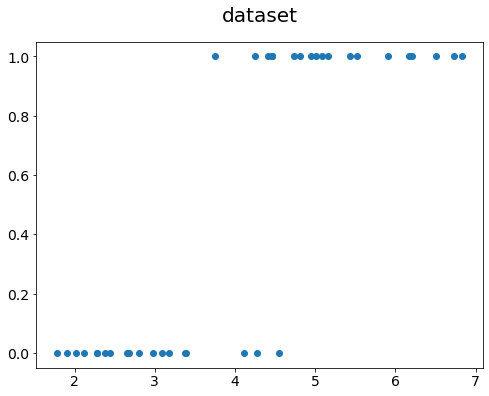

In [33]:
plot_graph(x,y,str_title='dataset')

In [37]:
w = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))
b = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))
                
def cross_entropy(y_pred, y_true):
    # 1e-9: log0은 정의 되지 않으므로 0에 가까운 값으로 주로 사용 / 1. : 0.9999란 의미
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return -tf.reduce_sum(y_true*tf.math.log(y_pred)+(1-y_true)*(tf.math.log(1-y_pred)))

In [38]:
lr = 0.001
optimizer = tf.optimizers.SGD(lr)

def run_optimization():
    with tf.GradientTape() as g:
        # 예상한 값
        pred = 1/(1+tf.exp(-1*(w*x+b)))
        loss = cross_entropy(pred,y)
        
    gradients  = g.gradient(loss, [w,b])
    optimizer.apply_gradients(zip(gradients,[w,b]))

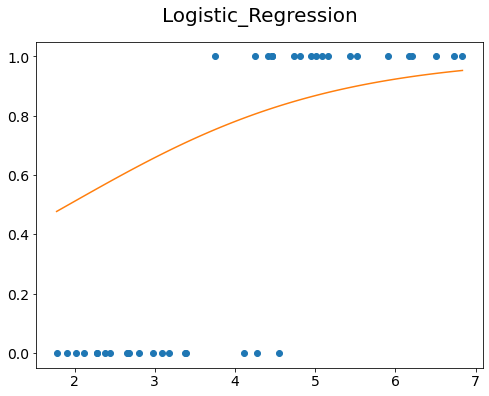

In [39]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x, y, X_hat=x_fl, Y_hat=1/(1+tf.exp(-1*(w*x_fl+b))), str_title = 'Logistic_Regression')

In [40]:
training_steps = 1000
display_step = 50
end_step = 0
for step in range(1, training_steps+1):
    run_optimization()
    
    if step% display_step == 0:
        pred = 1/(1+tf.exp(-1*(w*x+b)))
        loss = cross_entropy(pred, y)
        print("step: ", step, ", loss: ", loss.numpy())
        
end_step = step

step:  50 , loss:  19.74004
step:  100 , loss:  19.080261
step:  150 , loss:  18.47778
step:  200 , loss:  17.926277
step:  250 , loss:  17.420212
step:  300 , loss:  16.9547
step:  350 , loss:  16.525467
step:  400 , loss:  16.128746
step:  450 , loss:  15.761232
step:  500 , loss:  15.420025
step:  550 , loss:  15.10255
step:  600 , loss:  14.80655
step:  650 , loss:  14.53002
step:  700 , loss:  14.271181
step:  750 , loss:  14.028462
step:  800 , loss:  13.800457
step:  850 , loss:  13.585911
step:  900 , loss:  13.383705
step:  950 , loss:  13.192837
step:  1000 , loss:  13.0124


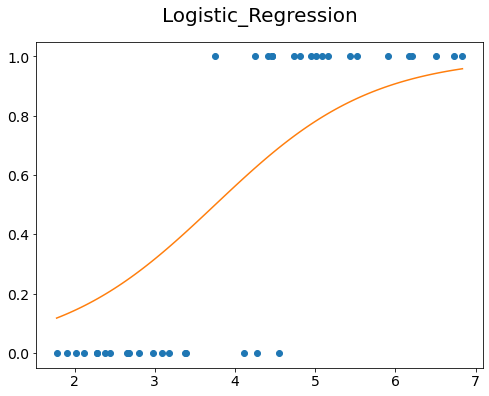

In [41]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x, y, X_hat=x_fl, Y_hat=1/(1+tf.exp(-1*(w*x_fl+b))), str_title = 'Logistic_Regression')

In [42]:
training_steps = 10000
display_step = 500

for step in range(end_step + 1, end_step + training_steps + 1):
    run_optimization()
    
    if step% display_step == 0:
        pred = 1/(1+tf.exp(-1*(w*x+b)))
        loss = cross_entropy(pred, y)
        print("step: ", step, ", loss: ", loss.numpy())
        
end_step = step

step:  1500 , loss:  11.6364155
step:  2000 , loss:  10.751654
step:  2500 , loss:  10.136191
step:  3000 , loss:  9.683735
step:  3500 , loss:  9.33733
step:  4000 , loss:  9.063783
step:  4500 , loss:  8.842442
step:  5000 , loss:  8.6598015
step:  5500 , loss:  8.506643
step:  6000 , loss:  8.376473
step:  6500 , loss:  8.264568
step:  7000 , loss:  8.167417
step:  7500 , loss:  8.082356
step:  8000 , loss:  8.007324
step:  8500 , loss:  7.940705
step:  9000 , loss:  7.8812075
step:  9500 , loss:  7.827793
step:  10000 , loss:  7.7796154
step:  10500 , loss:  7.735975
step:  11000 , loss:  7.696291
